In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, ConfusionMatrixDisplay


from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Carregando o Dataset
titanic_data = pd.read_csv("Dataset/ds_titanic.csv")

titanic_data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [3]:
columns_to_drop = [f'zero.{i}' for i in range(1, 19)]
titanic_data = titanic_data.drop(columns=columns_to_drop)
titanic_data=titanic_data.drop(columns=['zero'])
titanic_data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [4]:
titanic_data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64

In [5]:
titanic_data = titanic_data.dropna()

In [6]:
titanic_data = titanic_data.rename(columns={'2urvived': 'survived'})

In [7]:
X_train, X_test, y_train, y_test = train_test_split(titanic_data.drop('survived', axis=1), titanic_data['survived'], test_size=0.25, random_state=42)

In [8]:
model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=2, max_features='sqrt')

In [9]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [10]:
y_pred = model.predict(X_test)

In [11]:
print(accuracy_score(y_test, y_pred))

0.8746177370030581


In [12]:
rf_model = model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix:",cm)

Confusion Matrix: [[227  11]
 [ 30  59]]


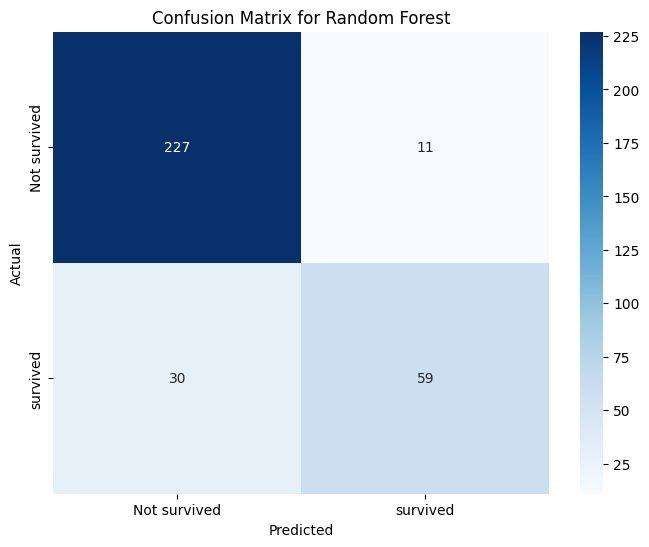

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not survived', 'survived'], yticklabels=['Not survived', 'survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest')
plt.show()